<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5; padding: 15px 5px; " >
<p>Use this notebook to follow along with the lab tutorial.</p>
</div>

# <font color="blue">Lesson 4 Feature Selection</font>

## Section 3. Filter-based Selection

### Mutual Information

In [80]:
!pip install -U mlxtend

Requirement already up-to-date: mlxtend in c:\users\ashukla\anaconda3\lib\site-packages (0.17.0)


Standard Deviation of Y=1.20


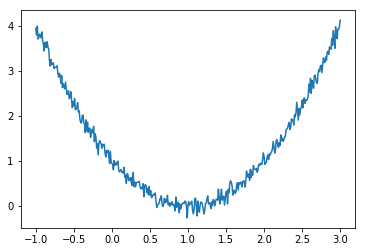

Correlation between X and Y is -0.00


In [81]:
import numpy as np

X = np.linspace(start = -1, stop = 3, num = 401, endpoint = True)
Y = X**2 - 2*X + 1
print("Standard Deviation of Y=%.2f"%np.std(Y))

noise_var = 0.1
noise = np.random.normal(0, noise_var, len(X))
Y += noise
#Y = noise

import matplotlib.pyplot as plt

plt.plot(X, Y)
plt.show()

# Calculation Correlation
corr = np.corrcoef(X, Y)[0, 1]
print("Correlation between X and Y is %.2f"%corr)
# Calculate Mutual Information

In [82]:

from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency = c_xy)
    return mi

mi = calc_MI(X, Y, 20)
print("Mutual information=%.2f"%mi)

Mutual information=1.78


## Section 4. Stepwise and Embedded Methods

### Stepwise Model Selection

#### Backward model selection

The below code performs backward selection and provides you with a list of selected features and the order in which they were dropped.
- retrain a linear regression using only the features that were selected and make sure the resulting model is the same as the model found by backward selection (by checking if the correlation is 1 for example)

In [83]:
# Recursive Feature Elimination
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
X, y = make_friedman1(n_samples = 50, n_features = 10, random_state = 0)
import pandas as pd
X = pd.DataFrame(X)
X.head()

0         1         2         3         4         5         6  \
0  0.548814  0.715189  0.602763  0.544883  0.423655  0.645894  0.437587   
1  0.791725  0.528895  0.568045  0.925597  0.071036  0.087129  0.020218   
2  0.978618  0.799159  0.461479  0.780529  0.118274  0.639921  0.143353   
3  0.264556  0.774234  0.456150  0.568434  0.018790  0.617635  0.612096   
4  0.359508  0.437032  0.697631  0.060225  0.666767  0.670638  0.210383   

          7         8         9  
0  0.891773  0.963663  0.383442  
1  0.832620  0.778157  0.870012  
2  0.944669  0.521848  0.414662  
3  0.616934  0.943748  0.681820  
4  0.128926  0.315428  0.363711

In [84]:
#sorted(np.corrcoef(X).reshape(-1))
np.corrcoef(X)

array([[ 1.        ,  0.33496905,  0.50650793, ...,  0.62171555,
         0.69047242, -0.29198673],
       [ 0.33496905,  1.        ,  0.63795055, ..., -0.10003949,
         0.28579216, -0.10240096],
       [ 0.50650793,  0.63795055,  1.        , ...,  0.05437283,
         0.17126241, -0.3303376 ],
       ...,
       [ 0.62171555, -0.10003949,  0.05437283, ...,  1.        ,
         0.42109128, -0.1333019 ],
       [ 0.69047242,  0.28579216,  0.17126241, ...,  0.42109128,
         1.        , -0.4947897 ],
       [-0.29198673, -0.10240096, -0.3303376 , ..., -0.1333019 ,
        -0.4947897 ,  1.        ]])

In [85]:
estimator = LinearRegression()
back_selector = RFE(estimator, 5, step = 1, verbose = True) # select 5 features, removing 1 feature at a time
back_selector = back_selector.fit(X, y)
print("The mask of selected features:")
print(back_selector.support_)
print("Ranking is the inverse of order of removal (higher rank is the first feature removed):")
print(back_selector.ranking_)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
The mask of selected features:
[ True  True  True  True  True False False False False False]
Ranking is the inverse of order of removal (higher rank is the first feature removed):
[1 1 1 1 1 2 3 6 5 4]


In [86]:
yhat_backward = back_selector.predict(X)

In [87]:
estimator = estimator.fit(X, y)
yhat_estimator = estimator.predict(X)

In [88]:
np.corrcoef([yhat_backward, yhat_estimator, y])

array([[1.        , 0.99038899, 0.88336559],
       [0.99038899, 1.        , 0.89193801],
       [0.88336559, 0.89193801, 1.        ]])

In [89]:
best_subset_index = back_selector.ranking_ < 2

X_subset = X.loc[:, best_subset_index]
X_subset.head(5)

0         1         2         3         4
0  0.548814  0.715189  0.602763  0.544883  0.423655
1  0.791725  0.528895  0.568045  0.925597  0.071036
2  0.978618  0.799159  0.461479  0.780529  0.118274
3  0.264556  0.774234  0.456150  0.568434  0.018790
4  0.359508  0.437032  0.697631  0.060225  0.666767

In [90]:
estimator_subset = LinearRegression()
estimator_subset.fit(X_subset, y)
yhat_estimator = estimator_subset.predict(X_subset)

np.corrcoef([yhat_backward, yhat_estimator, y])

array([[1.        , 1.        , 0.88336559],
       [1.        , 1.        , 0.88336559],
       [0.88336559, 0.88336559, 1.        ]])

### Stepwise selection

In [93]:
# Forward Stepwise Feature Selection
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

estimator = LinearRegression()

stepwise_selector = SFS(estimator, 
    k_features = 10, # k_features has to be smaller or equal to the number of features
                    # if equal to, it starts from intercept to the full model
    forward = True, 
    floating = False, 
    scoring = 'neg_mean_squared_error', 
    cv = 10)

stepwise_selector = stepwise_selector.fit(X.values, y)

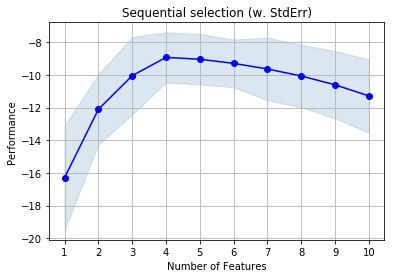

In [94]:
fig = plot_sfs(stepwise_selector.get_metric_dict(), kind = 'std_err')

plt.title('Sequential selection (w. StdErr)')
plt.grid()
plt.show()

Change the code above to do backward selection instead of forward. Do the results match more or less what we saw when we used `RFE`?

### Install Machine Learning Extensions
See <a href="http://rasbt.github.io/mlxtend/">mlxtend's documentation</a>

In [ ]:
# Uncomment the following line to run
# !pip install mlxtend

#### Forward Feature Selection

In [104]:
# Forward Stepwise Feature Selection
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target
X = pd.DataFrame(X, columns = boston.feature_names)
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [105]:
# Forward Stepwise Feature Selection
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

estimator = LinearRegression()

stepwise_selector = SFS(estimator, 
    k_features = 1, # k_features has to be smaller or equal to the number of features
                     # if equal to, it starts from intercept to the full model
    forward = False, 
    floating = False, 
    cv = 10)

stepwise_selector = stepwise_selector.fit(X.values, y)

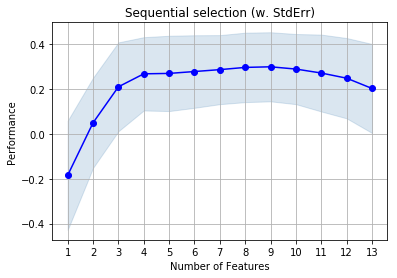

In [106]:
fig = plot_sfs(stepwise_selector.get_metric_dict(), kind = 'std_err')

plt.title('Sequential selection (w. StdErr)')
plt.grid()
plt.show()

### Get the Best Model

In [110]:
stepwise_selector.get_metric_dict()[4]

{'feature_idx': (5, 10, 11, 12),
 'cv_scores': array([ 0.75770718,  0.63704132, -0.25590531,  0.58431335,  0.62986348,
         0.66843323,  0.03340473, -0.06434708, -0.80228762,  0.48957185]),
 'avg_score': 0.2677795123518004,
 'feature_names': ('5', '10', '11', '12'),
 'ci_bound': 0.36399953219409314,
 'std_dev': 0.4900944999990795,
 'std_err': 0.16336483333302648}

In [111]:
yhat_stepwise = stepwise_selector.transform(X.values).flatten()
yhat_stepwise

array([ 4.98,  9.14,  4.03,  2.94,  5.33,  5.21, 12.43, 19.15, 29.93,
       17.1 , 20.45, 13.27, 15.71,  8.26, 10.26,  8.47,  6.58, 14.67,
       11.69, 11.28, 21.02, 13.83, 18.72, 19.88, 16.3 , 16.51, 14.81,
       17.28, 12.8 , 11.98, 22.6 , 13.04, 27.71, 18.35, 20.34,  9.68,
       11.41,  8.77, 10.13,  4.32,  1.98,  4.84,  5.81,  7.44,  9.55,
       10.21, 14.15, 18.8 , 30.81, 16.2 , 13.45,  9.43,  5.28,  8.43,
       14.8 ,  4.81,  5.77,  3.95,  6.86,  9.22, 13.15, 14.44,  6.73,
        9.5 ,  8.05,  4.67, 10.24,  8.1 , 13.09,  8.79,  6.72,  9.88,
        5.52,  7.54,  6.78,  8.94, 11.97, 10.27, 12.34,  9.1 ,  5.29,
        7.22,  6.72,  7.51,  9.62,  6.53, 12.86,  8.44,  5.5 ,  5.7 ,
        8.81,  8.2 ,  8.16,  6.21, 10.59,  6.65, 11.34,  4.21,  3.57,
        6.19,  9.42,  7.67, 10.63, 13.44, 12.33, 16.47, 18.66, 14.09,
       12.27, 15.55, 13.  , 10.16, 16.21, 17.09, 10.45, 15.76, 12.04,
       10.3 , 15.37, 13.61, 14.37, 14.27, 17.93, 25.41, 17.58, 14.81,
       27.26, 17.19,

In [114]:
yhat_stepwise = stepwise_selector.transform(X.values).flatten()

best_subset_index = stepwise_selector.get_metric_dict()[3]['feature_idx']
best_subset_index = list(best_subset_index)
X_subset = X.iloc[:, best_subset_index]
estimator_subset = LinearRegression()
estimator_subset.fit(X_subset, y)

yhat_estimator = estimator_subset.predict(X_subset)

np.corrcoef([yhat_stepwise, yhat_estimator, y])

array([[ 1.        , -0.89545379, -0.73766273],
       [-0.89545379,  1.        ,  0.82378648],
       [-0.73766273,  0.82378648,  1.        ]])

In [113]:
import seaborn as sns
# sns.set(style = "ticks")
y_data = pd.DataFrame(data = {'y': y, 'yhat_est': yhat_estimator, 'yhat_step': yhat_stepwise})
sns.pairplot(y_data)

ImportError: DLL load failed: The specified module could not be found.

### LASSO and Ridge Regression

In [119]:
# LASSO
from sklearn import linear_model
linear_model.Lasso()

alpha = 0.05 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha = alpha)
clf.fit(X, y)

print(clf.intercept_)
print(clf.score(X, y))

pred_clf = clf.predict(X)

25.301302442333878
0.7299765358139223


In [120]:
dd = pd.DataFrame({'col': X.columns, 'coef': clf.coef_})
dd
ax = sns.barplot(x = 'col', y = 'coef', data = dd)

NameError: name 'sns' is not defined

In [121]:
results = pd.DataFrame(columns = ['alpha', 'col', 'coef'])

for alpha in np.arange(0.01, 1, .01):
    clf = linear_model.Lasso(alpha = alpha)
    clf.fit(X, y)
    dd = pd.DataFrame({'col': X.columns, 'coef': clf.coef_})
    dd['alpha'] = alpha
    results = results.append(dd, sort = False)

In [122]:
results.head()

alpha    col       coef
0   0.01   CRIM  -0.106228
1   0.01     ZN   0.046860
2   0.01  INDUS   0.006474
3   0.01   CHAS   2.504190
4   0.01    NOX -14.394478

In [128]:
ax = sns.lineplot(x = 'alpha', y = 'coef', hue = 'col', data = results)

NameError: name 'sns' is not defined

In [129]:
lm = linear_model.LinearRegression()
lm.fit(X, y)
pred_lm = lm.predict(X)

In [125]:
np.corrcoef(pred_lm, pred_clf)

array([[1.        , 0.99280435],
       [0.99280435, 1.        ]])

In [126]:
# Ridge Regression
from sklearn import linear_model
alpha = 10
clf = linear_model.Ridge(alpha=alpha)
clf.fit(X, y)

print(clf.coef_)

print(clf.intercept_)

import numpy as np
# Increasing alpha can compress the L2 norm of the coefficients to 0 (but not selecting variables)
print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

[-0.10143535  0.0495791  -0.0429624   1.95202082 -2.37161896  3.70227207
 -0.01070735 -1.24880821  0.2795956  -0.01399313 -0.79794498  0.01003684
 -0.55936642]
27.467884964141327
Sum of square of coefficients = 25.74


In [127]:
clf.predict(X)

array([30.64823603, 24.61405157, 30.45069271, 29.25936249, 28.40323655,
       25.74372223, 23.0337783 , 19.07163867, 10.72279454, 18.79947671,
       18.57581282, 21.55640591, 21.12432436, 20.69160035, 20.01049835,
       20.45339034, 22.04447286, 17.48870308, 17.25462395, 19.16616601,
       12.63101811, 18.14354784, 16.08625959, 13.98380937, 16.10238061,
       13.8813256 , 16.04571342, 15.09555779, 20.03569785, 21.40181571,
       11.62378444, 18.45319835,  8.7693927 , 14.48757397, 13.69526422,
       23.80315732, 22.34818803, 23.5724674 , 23.42625201, 31.74438613,
       34.70511744, 28.44076412, 25.61159466, 24.9658905 , 22.85404142,
       21.96378508, 20.14855303, 17.11047901,  7.76514579, 16.77719851,
       21.05293691, 23.6677407 , 27.93221921, 24.26812164, 15.33349968,
       31.89904071, 25.58263902, 33.29860165, 22.70271527, 21.55285045,
       18.07344185, 18.22857204, 24.31636917, 23.20283405, 23.85212364,
       30.10925902, 24.98813107, 20.92446096, 16.91593307, 20.44

<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5; padding: 15px 5px; " >
<p>For additional practice, please see the Workshop notebooks.</p>
</div>